# Решающее дерево

Отметим, что решающее дерево состоит из вершин, в которых записывает некоторое условие, а в листах дерева - прогноз. Условия во внутренних вершинах выбираются простыми. Наиболее частый вариант - проверка лежит ли значение некоторого признака $x^j$ левее порога $t$:

$[x^j \leq t]$

Легко заметить, что такое условие зависит только от одного признака. Прогноз в листе является вещественным числом, если решается задача регрессии. Если же решается задача классификации, то в качестве прогноза выступает или класс или распределение вероятностей классов.

Запишем некоторую функцию ошибки следующим образом: есть набор данных $X_m$, есть номер рассматриваемого признака $j$ и есть порог $t$.

$L(X_m, j, t) \rightarrow \underset{j,t}{min}$

Осуществим перебор всех возможных признаков $j$ и порогов $t$ для этих признаков. Каждый раз исходное множество будет разбиваться на два подмножества:

$X_l = \{x \in X_m | [ x^j \leq t ] \}$ и $X_r = \{x \in X_m | [ x^j > t ] \}$

Пример деления подвыборки по одному атрибуту:
Если мы возьмем некоторые значения одного атрибута $x$ (например длина листа) для 5 объектов, которые принимают значения $[1.5, 0.9, 2.1, 1.6, 1.7]$ и некоторые классы $y$ этих листов, например $[0, 0, 1, 0, 1]$ соответсвенно. Тогда, используя этот признак как порог, можно разделить выборку на две подвыборки 4 различными способами:

1. 1 подвыборка $x: [0.9], y: [0]$, 2 подвыборка $x: [1.5, 2.1, 1.6, 1.7], y: [0, 1, 0, 1]$
2. 1 подвыборка $x: [0.9, 1.5], y: [0, 0]$, 2 подвыборка $x: [2.1, 1.6, 1.7], y: [1, 0, 1]$
3. 1 подвыборка $x: [0.9, 1.5, 1.6], y: [0, 0, 0]$, 2 подвыборка $x: [2.1, 1.7], y: [1, 1]$
4. 1 подвыборка $x: [0.9, 1.5, 1.6, 1.7], y: [0, 0, 0, 1]$, 2 подвыборка $x: [2.1], y: [1]$

Такую процедуру можно продолжить для каждого получившегося множества (рекурсивно вызывать функцию деления для получающихся подмножеств).

Необходимо отметить, что если вершина была объявлена листом, необходимо сделать прогноз для этого листа. Для задачи регрессии берется среднее значение по этой выборке,
для задачи классификации возвращается тот класс, которые наиболее популярен в выборке. Можно указывать вероятность классов в листе.

Для каждого разбиения необходимо расчитывать функцию потерь:

$L(X_m, j, t) = \frac{|X_l|}{|X_m|}H(X_l) + \frac{|X_r|}{|X_m|}H(X_r)$,

где $H(X)=\sum\limits_{k=1}^{K} p_k(1 - p_k)$ - критерий информативности Джинни.

$p_k$ - доля объектов класса $k$ в выборке X:

$p_k=\frac{1}{|X|}\sum\limits_{i \in X}{[y_i = k]}$

В задаче работаем только с числовыми данными и строим дерево классификации.

Данные сгенерированы случайным образом.

In [1]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

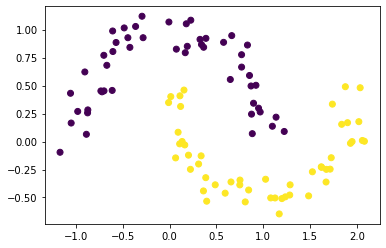

In [2]:
x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 13)

In [4]:
def ginny(value_k, len_y):
    if value_k==0:
        return 0
    else:
        pk = value_k/len_y
        return round(pk*(1-pk),5)

In [5]:
import numpy as np 
import pandas as pd
par1 = pd.DataFrame({'x1':x_train[:,0],'x2':x_train[:,1],'y':y_train})
par1['index'] = par1.index
par1 = par1.sort_values(by=['x1']).reset_index(drop=True)
par2 = par1.sort_values(by=['x2']).reset_index(drop=True)

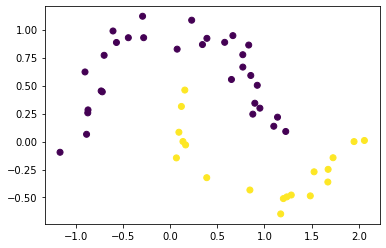

In [6]:
plt.scatter(x[50:100,0], x[50:100,1], c = y[50:100])


## Задание

Напишите класс дерева, который реализует метод train, которая получает на вход матрицу данных ($x$) и целевые переменные ($y$), на выходе функция возвращает дерево в виде словаря в каждом случае записывается номер признака ($i$), порог разбиения($t$), значение в листовой вершине слева ($y_l$) и значение в листовой вершине справа ($y_r$). Вместо занчения в листовой вершине может содержаться следующий словарь с теми же ключами и так далее.

В задании необходимо написать рекурсивную функцию.

Необходимо учесть:

1. Возможность строить дерево строго определенной глубины и возможность указать максимальное количество объектов в листовой вершине.
2. Пороги разбиения должны лежать строго по середине между ближайшими обектами.
3. Разбиений не требуется, если в получившемся множестве находятся объекты одного класса.
4. Количество различных классов объектов в целевой переменной может быть больше двух.


In [26]:
    d = {}
    counter = 1 
    max_depth = 15
    def train(par1, par2, counter, max_depth, d):
        branch = 0
        i,j = 0,0
        k,l = len(par1['y'])-1, len(par2['y'])-1
        
        if len(par1['y'].unique())>1:
            while (par1['y'][i]==par1['y'][i+1]):
                i+=1
            while (par2['y'][j]==par2['y'][j+1]):
                j+=1
            while (par1['y'][k]==par1['y'][k-1]):
                k-=1
            while (par2['y'][l]==par2['y'][l-1]):
                l-=1
                
            print('i = ', i+1,'j = ', j+1, 'k = ', len(par1['y'])-k,'l = ', len(par2['y'])-l)
            gi = ginny(min(par1["y"][i+1:].value_counts()), len(par1["y"]))
            gj = ginny(min(par2["y"][j+1:].value_counts()), len(par1["y"]))
            gk = ginny(min(par1["y"][:k].value_counts()), len(par1["y"]))
            gl = ginny(min(par2["y"][:l].value_counts()), len(par1["y"]))
            print('gi = ', gi,'gj = ', gj, 'gk = ', gk,'gl = ', gl)
            
            if max(i,j,len(par1['y'])-k,len(par2['y'])-l)==i:
                gi -= 0.0001
            elif max(i,j,len(par1['y'])-k,len(par2['y'])-l)==j:
                gj -= 0.0001
            elif max(i,j,len(par1['y'])-k,len(par2['y'])-l)==k:
                gk -= 0.0001
            else:
                gl -= 0.0001
            max_g = min(gi,gj,gk,gl)
            
            if  max_g == gi:
                tx = round((par1['x1'][i] + par1['x1'][i+1])/2, 4)
                ty = round((par1['x2'][i] + par1['x2'][i+1])/2, 4)
                branch = par1["y"][0:i+1].value_counts().tolist()
                ind = par1["index"][i]
                class_y = par1["y"][i]
                par1 = par1[i+1:].reset_index(drop=True)
                par2 = par1.sort_values(by=['x2']).reset_index(drop=True)
                d[counter] = ind, "left", 1, tx, ty,class_y, par1["y"].value_counts().tolist(), branch
                
            elif max_g == gj:        
                tx = round((par2['x1'][j] + par2['x1'][j+1])/2, 4)
                ty = round((par2['x2'][j] + par2['x2'][j+1])/2, 4)
                branch = par2["y"][0:j+1].value_counts().tolist()
                ind = par2["index"][j]
                class_y = par2["y"][j]
                par2 = par2[j+1:].reset_index(drop=True)
                par1 = par2.sort_values(by=['x1']).reset_index(drop=True)
                d[counter] = ind, "bottom", 2, tx, ty,class_y, par1["y"].value_counts().tolist(), branch
                
            elif max_g == gk:
                tx = round(par1['x1'][k], 4)
                ty = round(par1['x2'][k], 4)
                branch = par1["y"][k:len(par1['y'])].value_counts().tolist()
                ind = int(par1["index"][k])
                class_y = par1["y"][k]
                par1 = par1[:k].reset_index(drop=True)
                par2 = par1.sort_values(by=['x2']).reset_index(drop=True)
                d[counter] = ind, "right", 3, tx, ty,class_y, par1["y"].value_counts().tolist(), branch
                
            else:
                tx = round(par2['x1'][l],4)
                ty = round(par2['x2'][l],4)
                branch = par2["y"][l:len(par2['y'])].value_counts().tolist()
                ind = int(par2["index"][l])
                class_y = par2["y"][l]
                par2 = par2[:l].reset_index(drop=True)
                par1 = par2.sort_values(by=['x1']).reset_index(drop=True)
                d[counter] =ind, "top", 4, tx, ty,class_y, par1["y"].value_counts().tolist(),  branch
                round
                
            if counter < max_depth:
                counter += 1
                train (par1, par2, counter, max_depth, d)
                
        else:
            print('The End!')
            
        return (d)

In [27]:
train (par1, par2, counter, max_depth, d)

i =  1 j =  16 k =  2 l =  15
gi =  0.2464 gj =  0.1056 gk =  0.24 gl =  0.1924
i =  10 j =  4 k =  2 l =  15
gi =  0.14533 gj =  0.14533 gk =  0.10381 gl =  0.14533
i =  10 j =  9 k =  16 l =  15
gi =  0.10938 gj =  0.10938 gk =  0.10938 gl =  0.10938
i =  10 j =  4 k =  2 l =  4
gi =  0.10938 gj =  0.1875 gk =  0.10938 gl =  0.1875
i =  1 j =  4 k =  2 l =  2
gi =  0.22222 gj =  0.22222 gk =  0.22222 gl =  0.22222
The End!


{1: (30, 'bottom', 2, 1.4724, 0.04, 1, [28, 6], [16]),
 2: (46, 'right', 3, 1.9021, 0.1686, 1, [28, 4], [2]),
 3: (22, 'right', 3, 0.1677, 0.7939, 0, [12, 4], [16]),
 4: (7, 'left', 1, -0.3081, 0.5763, 0, [4, 2], [10]),
 5: (35, 'bottom', 2, 0.1133, 0.6429, 1, [2], [4])}

In [28]:
par1 = par1.sort_values(by=['x1']).reset_index(drop=True)
par2 = par1.sort_values(by=['x2']).reset_index(drop=True)

In [29]:
par1 = par1.sort_values(by=['index']).reset_index(drop=True)
par1['x2'][30]

0.009535519463701103

<ipython-input-30-61ab6ac65b4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par1['y1'][d[i][0]] = d[i][2] + 2


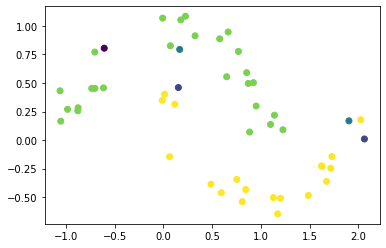

In [30]:
par1 = par1.sort_values(by=['index']).reset_index(drop=True)
counter = len(d.keys())
par1['y1'] = par1['y']+7
for i in range(counter):
    i+=1
    par1['y1'][d[i][0]] = d[i][2] + 2
    
plt.scatter(par1['x1'], par1['x2'], c = par1['y1'])

In [31]:
# par1 = par1.sort_values(by=['index']).reset_index(drop=True)
# counter = len(d.keys())
# par1['y1'] = par1['y']+7
# plt.figure(figsize=(12,12))
# for i in range(counter):
#     i+=1
#     print(d[i][0])
#     par1['y1'][d[i][0]] = d[i][2] + 2
# j=0
# for j in range(counter):
#   print(d[j+1][1],d[j+1][3],d[j+1][5])
#   if d[j+1][2] == 3 or d[j+1][2] == 1:
#     if d[j+1][5] ==1:
#       b='g'
#       plt.vlines(d[j+1][3], -1,1.3,colors= b)
#       j+=1
#     else:
#       b='r'
#       plt.vlines(d[j+1][3], -1,1.3,colors=b)
#       j+=1
#   else:
#     if d[j+1][5] ==1:
#       b='g'
#       plt.hlines(d[j+1][3], -1,2.5,colors= b)
#       j+=1
#     else:
#       b='r'
#       plt.hlines(d[j+1][3], -1,2.5,colors=b)
#       j+=1
#     #plt.hlines(d[j+1][3], -1,1.3,colors='g')
#     #j+=1



# plt.scatter(par1['x1'], par1['x2'], c = par1['y1'])

In [32]:
class Tree:
    def __init__(self, depth=1, mex_num_leaf=1):
        #code it
        return
        
    def train(self, x, y):
        #code it
        return
    
    def predict(self, x):
        y_pred = list()  
        for it in x.transpose():
            # Алгоритм классификации
            y_pred.append(np.round(np.random.random())) # Пока это не дерево, а просто генератор случайного класса.
        return np.array(y_pred)
        #code it

In [74]:
def classificator(xtest1, d, y_grid, max_depth):
    break_counter = 0
    for i in range(xx1.shape[0]):
        for j in range(len(y_grid[1])):
            dict_depth = 0
            break_counter = 0
            while break_counter != 1:
                dict_depth+=1

                if d[dict_depth][1] == 'left': 
                    if xtest1['x1'][i] <=  d[dict_depth][3]:
                        y_grid[i][j] = d[dict_depth][5]
                        break_counter = 1
                    elif (dict_depth) == max_depth:
                        y_grid[i][j] = d[dict_depth-1][5]
                        break_counter = 1

                elif d[dict_depth][1] == 'bottom':
                    if xtest1['x2'][j] <=  d[dict_depth][4]:
                        y_grid[i][j] = d[dict_depth][5]
                        break_counter = 1
                    elif (dict_depth) == max_depth:
                        y_grid[i][j] = d[dict_depth-1][5]
                        break_counter = 1

                elif d[dict_depth][1] == 'right':
                    if xtest1['x1'][i] >=  d[dict_depth][3]:
                        y_grid[i][j] = d[dict_depth][5]
                        break_counter = 1
                    elif (dict_depth) == max_depth:
                        y_grid[i][j] = d[dict_depth-1][5]
                        break_counter = 1

                elif d[dict_depth][1] == 'top':
                    if xtest1['x2'][j] >=  d[dict_depth][4]:
                        y_grid[i][j] = d[dict_depth][5]
                        break_counter = 1
                    elif (dict_depth) == max_depth:
                        y_grid[i][j] = d[dict_depth-1][5]
                        break_counter = 1
    return(y_grid)

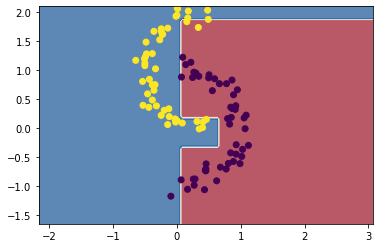

In [75]:
clf = Tree()
max_depth = len(d.keys())

h = .05
x0_min, x0_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
x1_min, x1_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                         np.arange(x1_min, x1_max, h))


xtest0 = xx0[0].tolist()
yyy=[]
for i in range(xx1.shape[0]):
    yyy.append(xx1[i][0])
y_grid = [[0 for j in range(xx1.shape[1])] for i in range(xx1.shape[0])]
for i in range (len(xtest0)-len(yyy)):
    yyy.append(0)
xtest1 = pd.DataFrame({'x1':yyy, 'x2':xtest0})


Z = classificator(xtest1, d, y_grid, max_depth)
Z = np.asarray(y_grid)
Z = Z.reshape(xx0.shape)
cm = plt.cm.RdBu
plt.contourf(xx0, xx1, Z, cmap=cm, alpha=.7)
plt.scatter(x[:,1], x[:,0], c = y)

# Постройте решающее дерево с глубиной 1, 2 и 3.

Визуализируйте получившиеся результаты классификатора на плоскости (как вы делали в пердыдущих заданиях). 
Код ниже вспомогательный, пока генерирует случайные значения для пространства.

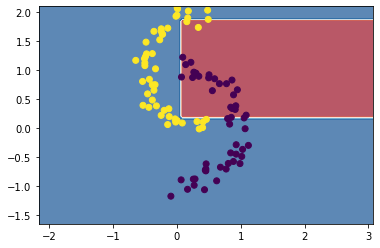

In [68]:
Z = classificator(xtest1, d, y_grid, 3)
Z = np.asarray(y_grid)
Z = Z.reshape(xx0.shape)
cm = plt.cm.RdBu
plt.contourf(xx0, xx1, Z, cmap=cm, alpha=.7)
plt.scatter(x[:,1], x[:,0], c = y)

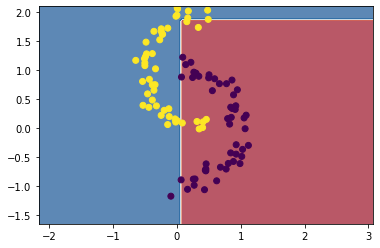

In [69]:
Z = classificator(xtest1, d, y_grid, 4)
Z = np.asarray(y_grid)
Z = Z.reshape(xx0.shape)
cm = plt.cm.RdBu
plt.contourf(xx0, xx1, Z, cmap=cm, alpha=.7)
plt.scatter(x[:,1], x[:,0], c = y)

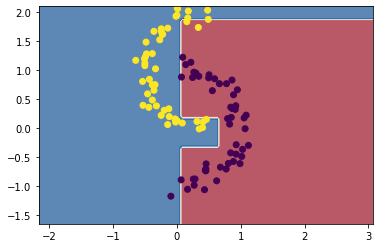

In [45]:
Z = classificator(xtest1, d, y_grid, 5)
Z = np.asarray(y_grid)
Z = Z.reshape(xx0.shape)
cm = plt.cm.RdBu
plt.contourf(xx0, xx1, Z, cmap=cm, alpha=.7)
plt.scatter(x[:,1], x[:,0], c = y)